# YouTube Trending Videos Analysis with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
# Load the datasets into a pandas dataframe
df = pd.read_csv("USvideos.csv")

# Define custom plot colors
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

# Set pandas display options
pd.options.display.float_format = '{:.2f}'.format

# Set seaborn style to "ticks"
sns.set(style="ticks")

# Set default matplotlib parameters
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## Data Exploration

In [3]:
df["description"] = df["description"].fillna(value="")

In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,35349.00,35349.00,35349.00,35349.00,35349.00
mean,20.10,1902529.32,61493.63,3097.44,7066.05
std,7.52,5839415.14,181625.60,29569.72,30680.32
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,201980.00,4485.00,170.00,526.00
50%,24.00,561752.00,15163.00,531.00,1589.00
75%,25.00,1501028.00,45309.00,1602.00,4692.00
max,43.00,149376127.00,3749810.00,1674420.00,1361580.00


## Data Visualization

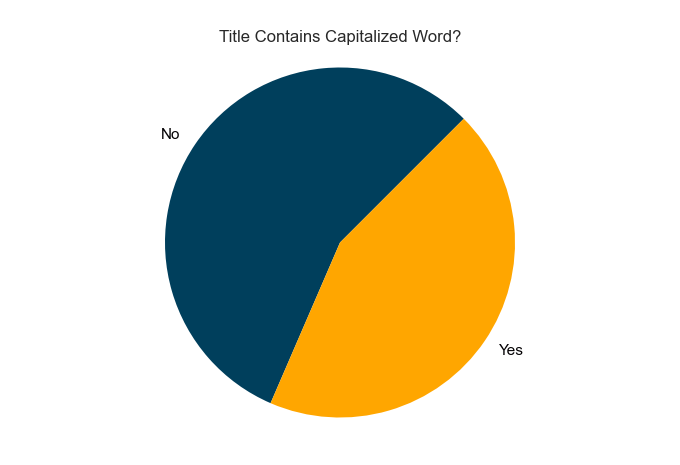

In [5]:
# Define a function to check if a string contains a capitalized word
def contains_capitalized_word(s):
    for w in s.split():  # Split the string into words
        if w.isupper():  # Check if the word is capitalized
            return True   # If a capitalized word is found, return True
    return False  # If no capitalized word is found, return False

# Apply the function to the "title" column and create a new column "contains_capitalized"
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

# Count the occurrences of True and False in the "contains_capitalized" column
value_counts = df["contains_capitalized"].value_counts().to_dict()

# Create a pie chart to visualize the distribution
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')  # Set aspect ratio to be equal for a perfect circle
_ = ax.set_title('Title Contains Capitalized Word?')  # Set the title of the plot

C:\Users\USER\AppData\Local\Temp\ipykernel_20200\1392737732.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


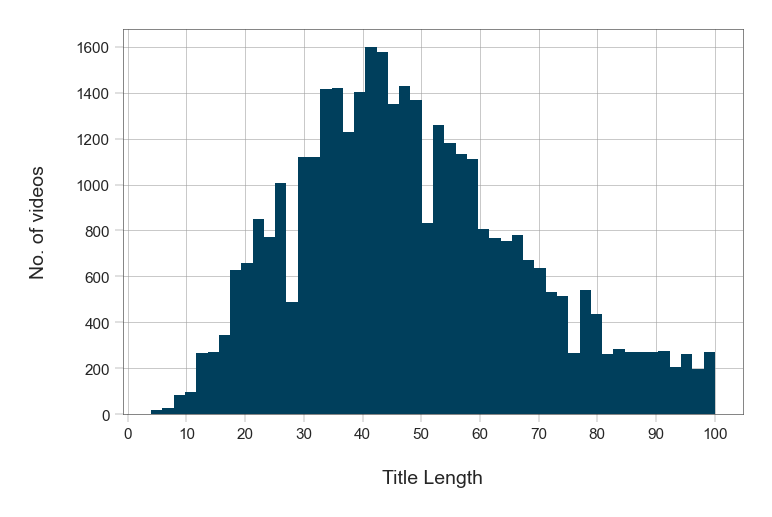

In [6]:
# Calculate the length of each title and create a new column "title_length"
df["title_length"] = df["title"].apply(lambda x: len(x))

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the histogram of title lengths
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)

# Set labels and ticks for the x and y axes
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

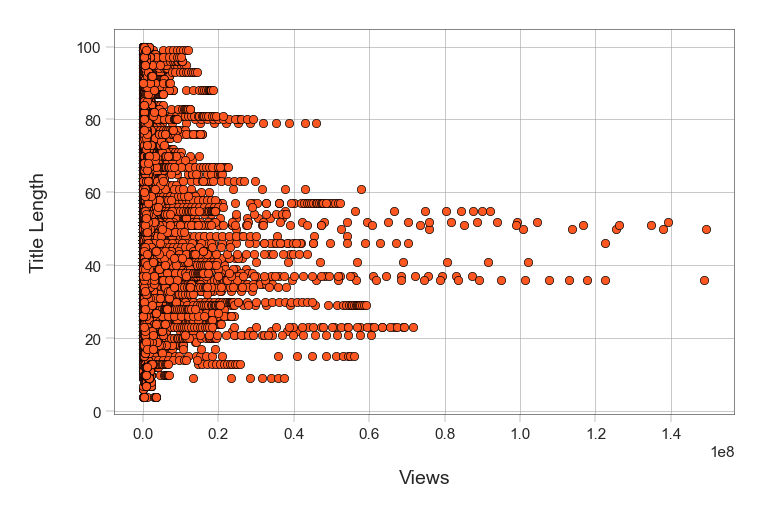

In [7]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the scatter plot of views vs title length
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)

# Set labels for the x and y axes
_ = ax.set(xlabel="Views", ylabel="Title Length")

## Youtube Trending Videos Analysis: Correlation

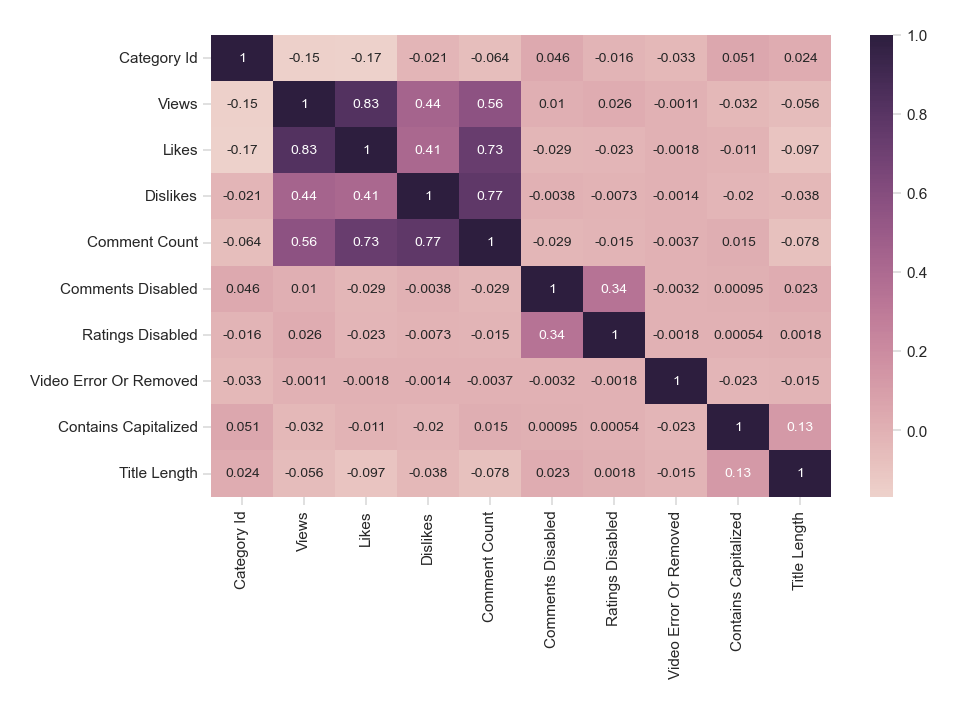

In [8]:
# Filter out non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number', 'bool'])

# Define human-readable labels for columns (replacing '_' with ' ' and capitalizing each word)
h_labels = [x.replace('_', ' ').title() for x in list(numeric_df.columns.values)]

# Create a new figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(10,6))

# Plot the heatmap of the correlation matrix for the numeric DataFrame
_ = sns.heatmap(numeric_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

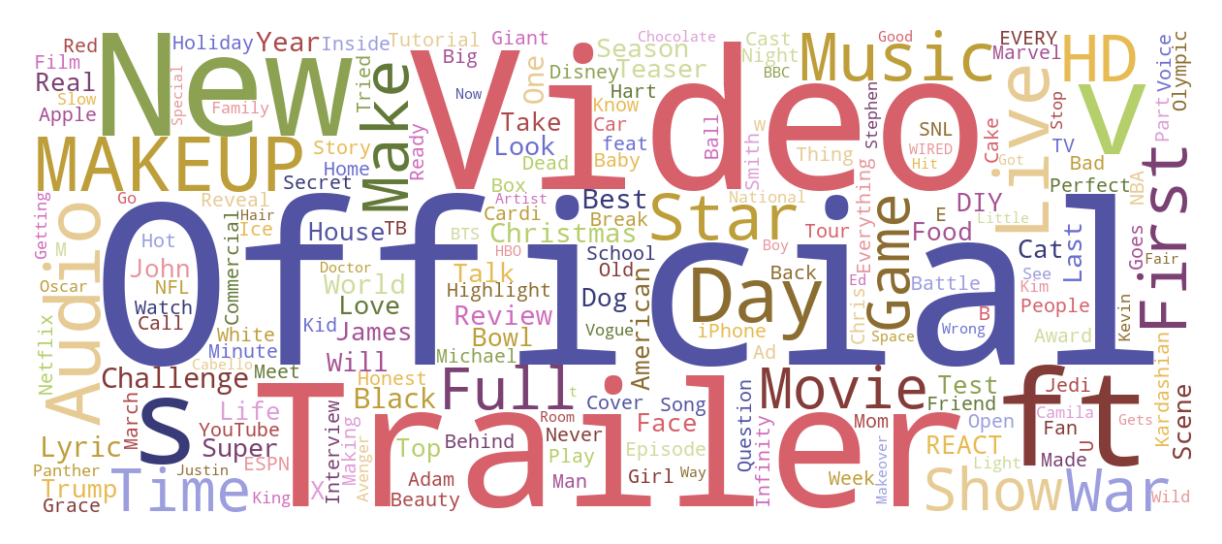

In [9]:
# Split each title into words and create a list of all words
title_words = list(df["title"].apply(lambda x: x.split()))

# Flatten the list of lists into a single list of words
title_words = [x for y in title_words for x in y]

# Create a WordCloud object with specified parameters
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))

# Create a new figure with a specified size
plt.figure(figsize=(15,10))

# Display the word cloud image
plt.imshow(wc, interpolation='bilinear')

# Turn off the axis
_ = plt.axis("off")